### Here's what we're going to do today:
<ul>
<li><b>Understand the concept of dimensionality reduction techniques</b></li>
<li><b>getting familiar with 3 of the most used techniques(PCA, Tsne and UMAP)</b></li>
<li><b>Understand the difference between Supervised vs unsupervised dimensionality reduction</b></li>

### Use case : Mnist dataset

In [4]:
#importing the dataset from tensorflow.dataset (availble everywhere) 
import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data() # given in tuple format



In [5]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


### Let's focus on the Training dataset, let's visualize it 

##### In how How many dimention the data is ?

Each image has a 28*28 dimentions, Humans can't see above 3D!
So to get an idea about the out data les take it down to 2D.

In [6]:
X=x_train.reshape(60000,-1) ## to be explained, ask the question what's the shape will be after this 

In [7]:

feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y_train


print ('Size of the dataframe: {}'.format(df.shape))


Size of the dataframe: (60000, 785)


##### let's see what we have now 

In [8]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


### The magic of Dimentionality reduction

#### I) PCA

In [24]:
from sklearn.decomposition import PCA # import it from sklearn
pca = PCA(n_components=2) # take me down to 2D
transformed_data=pca.fit_transform(X)# train with pca and transform the training set

how does the result look like ? 

In [25]:
print(transformed_data.shape) 

(60000, 2)


##### lets plot the result 

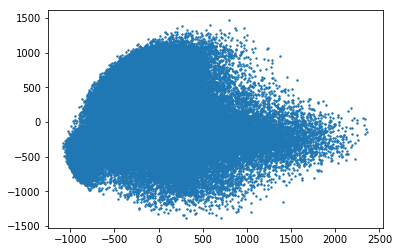

In [26]:
plt.scatter(transformed_data[:,0],transformed_data[:,1],s=2)

##### Nothing is really distensible out there, let's add some color from the labels

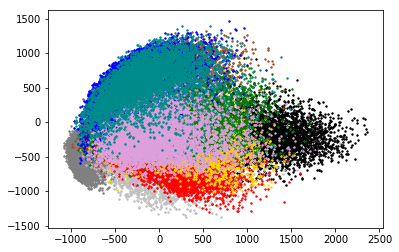

In [27]:
import matplotlib.cm as cm
colors = ['black','gray','silver','red','sienna','gold','green','blue','plum','darkcyan',] # prepare 10 colors
plt.figure()
for label in range(10): # loop all possible labels and plot them in the same figure with different colors
    plt.scatter(transformed_data[:,0][df['label']==label], transformed_data[:,1][df['label']==label], c=colors[label],s=2)
plt.show()



##### you can already see the clusters, but not so clear

you can see more about PCA parametrs [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

#### II) T-SNE (founded by Facebook in 2008)

In [ ]:
from sklearn.manifold import TSNE # this can be super slooow
transformed_data = TSNE(n_components=2).fit_transform(X)
plt.scatter(transformed_data[:,0],transformed_data[:,1],s=2)

you can see more about T-SNE parameters [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

#### II) UMAP (Based on paper published by Leland McInnes, John Healy, James Melville)

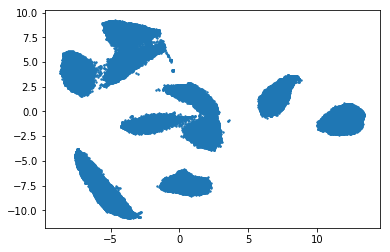

In [28]:
import umap # if not found install it 'pip install umap-learn'
transformed_data = umap.UMAP().fit_transform(X)
plt.scatter(transformed_data[:,0],transformed_data[:,1],s=2)

It's waaay better no ? lets color it 

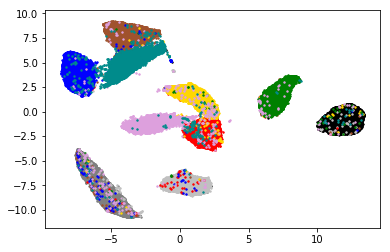

In [29]:
import matplotlib.cm as cm
colors = ['black','gray','silver','red','sienna','gold','green','blue','plum','darkcyan',] # prepare 10 colors
plt.figure()
for label in range(10): # loop all possible labels and plot them in the same figure with different colors
    plt.scatter(transformed_data[:,0][df['label']==label], transformed_data[:,1][df['label']==label], c=colors[label],s=2)
plt.show()


##### what about a supervised umap 

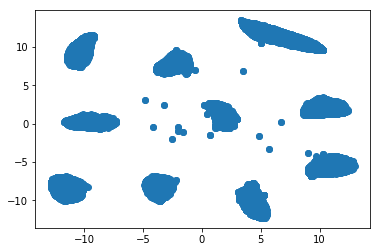

In [18]:
import umap # if not found install it 'pip install umap-learn'
transformed_data = umap.UMAP().fit_transform(X,y=y_train)
plt.scatter(transf°ormed_data[:,0],transformed_data[:,1])

You can already see that we have 10 clusters ! 
Awesome no ? what about some more colors :D

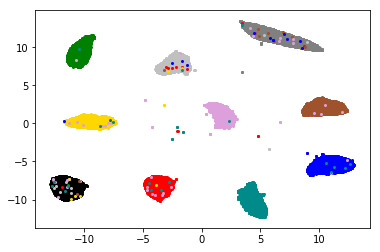

In [23]:
import matplotlib.cm as cm
colors = ['black','gray','silver','red','sienna','gold','green','blue','plum','darkcyan',] # prepare 10 colors
plt.figure()
for label in range(10): # loop all possible labels and plot them in the same figure with different colors
    plt.scatter(transformed_data[:,0][df['label']==label], transformed_data[:,1][df['label']==label], c=colors[label],s=4)
plt.show()

you can see more about UMAP parameters [here](https://umap-learn.readthedocs.io/en/latest/)